<a href="https://colab.research.google.com/github/seunghwan-cha/seunghwancha/blob/main/nsmc_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import nltk

In [11]:
import nltk

In [12]:
nltk.__version__

'3.2.5'

In [13]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [45]:
pip install tensorflow

In [46]:
pip install konlpy

In [47]:
import tensorflow
tensorflow.__version__

'2.4.0'

In [48]:
import keras
keras.__version__

'2.4.3'

In [49]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [50]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/seunghwan-cha/seunghwancha/main/ratings_train.txt", filename="ratings_train.txt")


('ratings_train.txt', <http.client.HTTPMessage at 0x7f0d88e01eb8>)

In [51]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/seunghwan-cha/seunghwancha/main/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7f0d88ddb320>)

In [52]:
train_data = pd.read_table('ratings_train.txt')


In [53]:
test_data = pd.read_table('ratings_test.txt')

In [54]:
train_data

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [55]:
test_data

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [56]:
print(len(train_data))

150000


In [57]:
train_data['document'].nunique(), train_data['label'].nunique()

(146182, 2)

In [58]:
train_data.drop_duplicates(subset=['document'], inplace=True) #document 열에서 중복인 내용은 제거

In [59]:
print('총 샘플의 수 :', len(train_data))

총 샘플의 수 : 146183


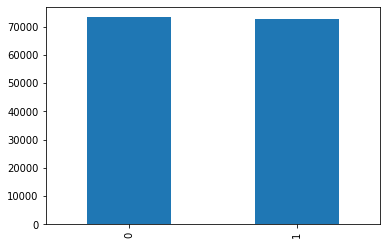

In [60]:
train_data['label'].value_counts().plot(kind = 'bar')

In [61]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  73342
1      1  72841


In [62]:
print(train_data.isnull().sum())

id          0
document    1
label       0
dtype: int64


In [63]:
train_data.loc[train_data.document.isnull()]

,id,document,label
25857,2172111,NaN,1


In [64]:
train_data = train_data.dropna(how = 'any')  #널 값이 존재하는 행 제거
print(train_data.isnull().values.any())  #널 값이 존재하는지 확인

False


In [65]:
print(len(train_data))

146182


In [66]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
train_data['document'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

id            0
document    391
label         0
dtype: int64


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [68]:
train_data.loc[train_data.document.isnull()]

,id,document,label
584,7117896,NaN,0
593,6478189,NaN,0
638,9364602,NaN,0
668,1600635,NaN,0
1559,6918082,NaN,1
...,...,...,...
146607,4602734,NaN,0
147059,7089618,NaN,1
148550,8588827,NaN,0
149358,6780491,NaN,0


In [69]:
train_data = train_data.dropna(how = 'any')
print(len(train_data))

145791


In [70]:
test_data.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 48995


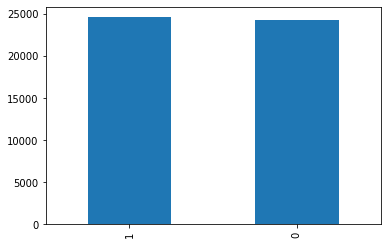

In [71]:
test_data['label'].value_counts().plot(kind = 'bar')

In [72]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [73]:
pip install konlpy

In [74]:
from konlpy.tag import Okt


In [75]:
okt = Okt()
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)

['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [ ]:
#https://iostream.tistory.com/144 형태소 분석기 모델 분석 비교
#연산 속도가 중요하다면 mecab을 최우선으로 고려해야하며, 심지어 분석 품질도 상위권으로 보여짐


#출처: https://iostream.tistory.com/144 [Almost Baseball, CSE and Diary]

In [ ]:
# 형태소 분석기 Mecab 사용법
'''
매개 변수:	dicpath – The path of the MeCab-ko dictionary.
morphs(phrase)¶
Parse phrase to morphemes.

nouns(phrase)
Noun extractor.

pos(phrase, flatten=True)
POS tagger.

매개 변수:	flatten – If False, preserves eojeols.'''

In [99]:
!pip install mecab-python3

In [77]:
!apt-get update

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done


In [78]:
!apt-get install g++ openjdk-8-jdk python-dev python3-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-dev is already the newest version (2.7.15~rc1-1).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
python3-dev is already the newest version (3.6.7-1~18.04).
openjdk-8-jdk is already the newest version (8u275-b01-0ubuntu1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.


In [79]:
!pip3 install JPype1-py3

In [100]:
!pip3 install konlpy

In [81]:
!JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"

In [101]:
!pip install konlpy

In [102]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip3 install JPype1-py3

In [93]:
import os
os.chdir('/tmp/')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.1.tar.gz
!tar zxfv mecab-0.996-ko-0.9.1.tar.gz
os.chdir('/tmp/mecab-0.996-ko-0.9.1')
!./configure
!make
!make check
!make install


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1380k  100 1380k    0     0  1149k      0  0:00:01  0:00:01 --:--:-- 2426k
mecab-0.996-ko-0.9.1/
mecab-0.996-ko-0.9.1/config.h.in
mecab-0.996-ko-0.9.1/Makefile.train
mecab-0.996-ko-0.9.1/ChangeLog
mecab-0.996-ko-0.9.1/configure
mecab-0.996-ko-0.9.1/swig/
mecab-0.996-ko-0.9.1/swig/version.h.in
mecab-0.996-ko-0.9.1/swig/Makefile
mecab-0.996-ko-0.9.1/swig/version.h
mecab-0.996-ko-0.9.1/swig/MeCab.i
mecab-0.996-ko-0.9.1/mkinstalldirs
mecab-0.996-ko-0.9.1/mecab-config.in
mecab-0.996-ko-0.9.1/configure.in
mecab-0.996-ko-0.9.1/mecab.iss.in
mecab-0.996-ko-0.9.1/aclocal.m4
mecab-0.996-ko-0.9.1/mecabrc.in
mecab-0.996-ko-0.9.1/INSTALL
mecab-0.996-ko-0.9.1/AUTHORS
mecab-0.996-ko-0.9.1/example/
mecab-0.996-ko-0.9.1/example/example_lattice.c
mecab-0.996-ko-0.9.1/

In [94]:

os.chdir('/tmp')
!curl -LO http://ftpmirror.gnu.org/automake/automake-1.11.tar.gz
!tar -zxvf automake-1.11.tar.gz
os.chdir('/tmp/automake-1.11')
!./configure
!make
!make install


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1339k  100 1339k    0     0   599k      0  0:00:02  0:00:02 --:--:-- 1332k
automake-1.11/
automake-1.11/THANKS
automake-1.11/ChangeLog.03
automake-1.11/automake.in
automake-1.11/ChangeLog.96
automake-1.11/ChangeLog.98
automake-1.11/m4/
automake-1.11/m4/gcj.m4
automake-1.11/m4/missing.m4
automake-1.11/m4/runlog.m4
automake-1.11/m4/lex.m4
automake-1.11/m4/vala.m4
automake-1.11/m4/obsol-gt.m4
automake-1.11/m4/obsol-lt.m4
automake-1.11/m4/minuso.m4
automake-1.11/m4/ccstdc.m4
automake-1.11/m4/install-sh.m4
automake-1.11/m4/upc.m4
automake-1.11/m4/sanity.m4
automake-1.11/m4/amversion.m4
automake-1.11/m4/make.m4
automake-1.11/m4/auxdir.m4
automake-1.11/m4/options.m4
automake-1.1

In [95]:
import os
os.chdir('/tmp/')

 
!wget -O m4-1.4.9.tar.gz http://ftp.gnu.org/gnu/m4/m4-1.4.9.tar.gz
!tar -zvxf m4-1.4.9.tar.gz
os.chdir('/tmp/m4-1.4.9')
!./configure
!make
!make install

os.chdir('/tmp')
!curl -OL http://ftpmirror.gnu.org/autoconf/autoconf-2.69.tar.gz
!tar xzf autoconf-2.69.tar.gz
os.chdir('/tmp/autoconf-2.69')
!./configure --prefix=/usr/local
!make
!make install
!export PATH=/usr/local/bin

--2020-12-21 16:30:45--  http://ftp.gnu.org/gnu/m4/m4-1.4.9.tar.gz
Resolving ftp.gnu.org (ftp.gnu.org)... 209.51.188.20, 2001:470:142:3::b
Connecting to ftp.gnu.org (ftp.gnu.org)|209.51.188.20|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 770647 (753K) [application/x-gzip]
Saving to: ‘m4-1.4.9.tar.gz’

m4-1.4.9.tar.gz     100%[===================>] 752.58K  1.92MB/s    in 0.4s    

2020-12-21 16:30:46 (1.92 MB/s) - ‘m4-1.4.9.tar.gz’ saved [770647/770647]

m4-1.4.9/
m4-1.4.9/acinclude.m4
m4-1.4.9/aclocal.m4
m4-1.4.9/AUTHORS
m4-1.4.9/BACKLOG
m4-1.4.9/bootstrap
m4-1.4.9/c-boxes.el
m4-1.4.9/ChangeLog
m4-1.4.9/checks/
m4-1.4.9/checks/001.comments
m4-1.4.9/checks/002.input_proc
m4-1.4.9/checks/003.input_proc
m4-1.4.9/checks/004.inhibiting
m4-1.4.9/checks/005.inhibiting
m4-1.4.9/checks/006.inhibiting
m4-1.4.9/checks/007.inhibiting
m4-1.4.9/checks/008.inhibiting
m4-1.4.9/checks/009.inhibiting
m4-1.4.9/checks/010.macro_argu
m4-1.4.9/checks/011.macro_argu
m4-1.4.9/chec

In [96]:
import os
os.chdir('/tmp')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko-dic/downloads/mecab-ko-dic-2.0.1-20150920.tar.gz
!tar -zxvf mecab-ko-dic-2.0.1-20150920.tar.gz
os.chdir('/tmp/mecab-ko-dic-2.0.1-20150920')
!./autogen.sh
!./configure
!make
# !sh -c 'echo "dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic" > /usr/local/etc/mecabrc'
!make install

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 46.3M  100 46.3M    0     0  19.0M      0  0:00:02  0:00:02 --:--:-- 33.1M
mecab-ko-dic-2.0.1-20150920/
mecab-ko-dic-2.0.1-20150920/configure.ac
mecab-ko-dic-2.0.1-20150920/Person-actor.csv
mecab-ko-dic-2.0.1-20150920/IC.csv
mecab-ko-dic-2.0.1-20150920/model.def
mecab-ko-dic-2.0.1-20150920/user-dic/
mecab-ko-dic-2.0.1-20150920/user-dic/place.csv
mecab-ko-dic-2.0.1-20150920/user-dic/README.md
mecab-ko-dic-2.0.1-20150920/user-dic/person.csv
mecab-ko-dic-2.0.1-20150920/user-dic/nnp.csv
mecab-ko-dic-2.0.1-20150920/Place.csv
mecab-ko-dic-2.0.1-20150920/rewrite.def
mecab-ko-dic-2.0.1-20150920/tools/
mecab-ko-dic-2.0.1-20150920/tools/add-userdic.sh
mecab-ko-dic-2.0.1-20150920/tools/mecab-bestn.sh
mecab-ko-dic-2.0.1-20150920/tools/convert_for_using_store.sh

In [97]:
# install mecab-python
import os
os.chdir('/content')

!git clone https://bitbucket.org/eunjeon/mecab-python-0.996.git
os.chdir('/content/mecab-python-0.996')

!python3 setup.py build
!python3 setup.py install


Cloning into 'mecab-python-0.996'...
remote: Counting objects: 17, done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 17 (delta 3), reused 0 (delta 0)
Unpacking objects: 100% (17/17), done.
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.6
copying MeCab.py -> build/lib.linux-x86_64-3.6
running build_ext
building '_MeCab' extension
creating build/temp.linux-x86_64-3.6
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/include -I/usr/include/python3.6m -c MeCab_wrap.cxx -o build/temp.linux-x86_64-3.6/MeCab_wrap.o
x86_64-linux-gnu-g++ -pthread -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -Wl,-z,relro -Wl,-Bsymbolic-functions -Wl,-z,relro -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 build/temp.linux-x86_64-3.6/MeCab_wrap.o -L/usr/local/lib -lmecab -lstdc

In [122]:
!apt-get install -y autoconf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  automake autotools-dev libsigsegv2 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc libtool gettext m4-doc
The following NEW packages will be installed:
  autoconf automake autotools-dev libsigsegv2 m4
0 upgraded, 5 newly installed, 0 to remove and 59 not upgraded.
Need to get 1,082 kB of archives.
After this operation, 3,994 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsigsegv2 amd64 2.12-1 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 m4 amd64 1.4.18-1 [197 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 autoconf all 2.69-11 [322 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 autotools-dev all 20180224.1 [39.6 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic/main amd64 automake all 1:1.15.1-3ubuntu2 [509 kB]
Fet

In [127]:
! sudo apt-get install curl
! bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libcurl4 libcurl4-openssl-dev
Suggested packages:
  libcurl4-doc libidn11-dev libkrb5-dev libldap2-dev librtmp-dev libssh2-1-dev
The following packages will be upgraded:
  curl libcurl4 libcurl4-openssl-dev
3 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
Need to get 668 kB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libcurl4-openssl-dev amd64 7.58.0-2ubuntu3.12 [294 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 curl amd64 7.58.0-2ubuntu3.12 [159 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libcurl4 amd64 7.58.0-2ubuntu3.12 [214 kB]
Fetched 668 kB in 1s (530 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog ba

In [128]:
import MeCab


In [129]:
from konlpy.tag import Mecab

In [130]:
mecab = Mecab()

In [131]:
mecab.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔')

['와',
 '이런',
 '것',
 '도',
 '영화',
 '라고',
 '차라리',
 '뮤직',
 '비디오',
 '를',
 '만드',
 '는',
 '게',
 '나을',
 '뻔']

In [132]:
X_train = []
for sentence in train_data['document']:
    temp_X = []
    temp_X = mecab.morphs(sentence)
    temp_X = [word for word in temp_X if not word in stopwords]
    X_train.append(temp_X)
    
    

In [133]:
print(X_train[:10])

[['아', '더', '빙', '진짜', '짜증', '나', '네요', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍', '지', '않', '구나'], ['너무', '재', '밓었다그래서보는것을추천한다'], ['교도소', '이야기', '구먼', '솔직히', '재미', '없', '다', '평점', '조정'], ['사이몬페그', '익살', '스런', '연기', '돋보였', '던', '영화', '스파이더맨', '에서', '늙', '어', '보이', '기', '만', '했', '던', '커스틴', '던스트', '너무나', '이뻐', '보였', '다'], ['막', '걸음마', '뗀', '세', '부터', '초등', '학교', '학년', '생', '인', '살용', '영화', 'ㅋㅋㅋ', '별반', '개', '아까움'], ['원작', '긴장감', '을', '제대로', '살려', '내', '지', '못했', '다'], ['별', '반개', '아깝', '다', '욕', '나온다', '이응경', '길용우', '연기', '생활', '몇', '년', '인지', '정말', '발', '로', '해도', '그것', '보단', '낫', '겟', '다', '납치', '감금', '만', '반복', '반복', '드라마', '가족', '없', '다', '연기', '못', '하', '사람', '만', '모엿', '네'], ['액션', '없', '는데', '재미', '있', '몇', '안', '되', '영화'], ['왜', '케', '평점', '낮', '건데', '꽤', '볼', '만', '한데', '헐리우드', '식', '화려', '함', '만', '너무', '길들여져', '있', '나']]


In [134]:
X_test = []
for sentence in test_data['document']:
    temp_X = []
    temp_X = mecab.morphs(sentence)
    temp_X = [word for word in temp_X if not word in stopwords]
    X_test.append(temp_X)

In [135]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [9]:
print(tokenizer.word_index)

NameError: ignored

In [137]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 50048
등장 빈도가 2번 이하인 희귀 단어의 수: 28427
단어 집합에서 희귀 단어의 비율: 56.79947250639387
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.7662535691327943


In [138]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 21623


In [139]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [140]:
print(X_train[:3])

[[25, 65, 912, 31, 213, 13, 26, 697], [975, 480, 327, 630, 2, 108, 1549, 46, 788, 950, 9, 36, 366], [17, 190, 1]]


In [141]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [142]:
y_train

array([0, 1, 0, ..., 0, 1, 0])

In [143]:
train_data

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1
...,...,...,...
149995,6222902,인간이 문제지 소는 뭔죄인가,0
149996,8549745,평점이 너무 낮아서,1
149997,9311800,이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다,0
149998,2376369,청춘 영화의 최고봉방황과 우울했던 날들의 자화상,1


In [144]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence)<1]

In [145]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

145380
145380


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


리뷰의 최대 길이 : 83
리뷰의 평균 길이 : 13.803755674783327


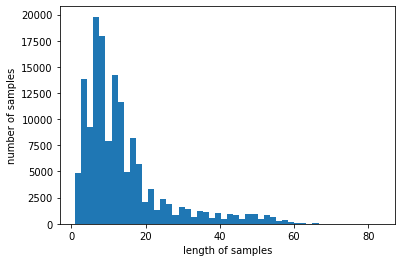

In [146]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [147]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [148]:
max_len = 40
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 40 이하인 샘플의 비율: 94.77025725684413


In [149]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [6]:
pd.read

AttributeError: ignored

from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [152]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [153]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [154]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

NameError: ignored

In [7]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

NameError: ignored

In [158]:
def sentiment_predict(new_sentence):
  new_sentence = mecab.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))
    

In [165]:
sentiment_predict('이것도 영화라고 만든건가?')

90.71% 확률로 부정 리뷰입니다.



In [161]:
sentiment_predict('이영화 안습')

98.07% 확률로 부정 리뷰입니다.



In [162]:
sentiment_predict('그럭저럭 볼만함. 시간때우기용')

93.97% 확률로 부정 리뷰입니다.



In [163]:
sentiment_predict('가족과 함께 볼만함')

93.06% 확률로 긍정 리뷰입니다.



In [5]:
import pandas as pd

df_test=pd.read_csv("ko_data.csv",header=0, delimiter=",",encoding='CP949')


df_test.head()

FileNotFoundError: ignored

In [166]:
df_test["review"]=df_test.review.apply(lambda x: clean_text(x))
df_test["sentiment"] = df_test["id"].map(lambda x: 1 if int(x.strip('"').split("_")[1]) >= 5 else 0)
y_test = df_test["sentiment"]

NameError: ignored

In [ ]:
def sentiment_predict_csv(new_sentence):
    new_sentence = mecab.morphs(new_sentence) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(loaded_model.predict(pad_new)) # 예측

    if score > 0.5:
        return 1
    else:
        return 0
    


    


In [ ]:

result = []
for index, row in df_test.iterrows():

    result.append(sentiment_predict_csv(row['Sentence']))

    

In [ ]:
print(result[0:5])

[1, 0, 0, 1, 0]


In [ ]:
import pandas as pd
submission = pd.DataFrame()

In [ ]:
import copy
df_sub = copy.deepcopy(df_test)
df_sub["Predicted"] = result
df_sub = df_sub[['Id','Predicted']]
df_sub.to_csv("submission.csv",index=False)

In [ ]:
print("submission.csv"[0:5])

submi


In [ ]:
submission.csv[0:5]

AttributeError: 'DataFrame' object has no attribute 'csv'

In [ ]:
!head submission.csv

Id,Predicted
0,1
1,0
2,0
3,1
4,0
5,1
6,0
7,1
8,0
